In [113]:
import numpy as np
import pandas as pd
import os
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 20)

In [114]:
os.getcwd()

'c:\\Users\\soler\\OneDrive\\THE_BRIDGE\\GITHUB\\DEREPO_ds_ft_sep_22\\Entregas\\EDA'

In [115]:
os.chdir("c:\\Users\\soler\\OneDrive\\THE_BRIDGE\\GITHUB\\DEREPO_ds_ft_sep_22\\Entregas\\EDA")

In [116]:
os.getcwd()

'c:\\Users\\soler\\OneDrive\\THE_BRIDGE\\GITHUB\\DEREPO_ds_ft_sep_22\\Entregas\\EDA'

# RENTAL

In [117]:
alq_alicante = pd.read_excel("raw/ALQ_COM_VALENCIANA.xlsx", sheet_name="ALQ_ALICANTE")
alq_castellon = pd.read_excel("raw/ALQ_COM_VALENCIANA.xlsx", sheet_name="ALQ_CASTELLON")
alq_valencia = pd.read_excel("raw/ALQ_COM_VALENCIANA.xlsx", sheet_name="ALQ_VALENCIA")
idealista_table = pd.read_csv("idealista_localidades_cv.csv")

### VALENCIA

In [118]:
alq_valencia.keys()

Index(['Mes', 'Precio_alq_Valencia', 'unidad', 'Variación_mensual_Valencia',
       'Variación_trimestral_Valencia', 'Variación_anual_Valencia'],
      dtype='object')

In [119]:
alq_valencia = alq_valencia.drop('unidad',axis=1)
alq_valencia

,Mes,Precio_alq_Valencia,Variación_mensual_Valencia,Variación_trimestral_Valencia,Variación_anual_Valencia
0,9/1/22,9.60000,0.01000,0.07000,0.16000
1,8/1/22,9.50000,0.04000,0.08000,0.14000
2,7/1/22,9.10000,0.02000,0.06000,0.11000
3,6/1/22,9.00000,0.02000,0.05000,0.10000
4,5/1/22,8.80000,0.02000,0.03000,0.08000
...,...,...,...,...,...
196,5/1/06,9.70000,0.00000,0.00000,0.00000
197,4/1/06,9.70000,0.00000,0.00000,0.00000
198,3/1/06,9.70000,0.00000,0.00000,0.00000
199,2/1/06,9.70000,0.00000,0.00000,0.00000


In [120]:
alq_valencia["date"]= pd.to_datetime(alq_valencia.Mes)
alq_valencia = alq_valencia.drop('Mes',axis=1)

alq_valencia

,Precio_alq_Valencia,Variación_mensual_Valencia,Variación_trimestral_Valencia,Variación_anual_Valencia,date
0,9.60000,0.01000,0.07000,0.16000,2022-09-01
1,9.50000,0.04000,0.08000,0.14000,2022-08-01
2,9.10000,0.02000,0.06000,0.11000,2022-07-01
3,9.00000,0.02000,0.05000,0.10000,2022-06-01
4,8.80000,0.02000,0.03000,0.08000,2022-05-01
...,...,...,...,...,...
196,9.70000,0.00000,0.00000,0.00000,2006-05-01
197,9.70000,0.00000,0.00000,0.00000,2006-04-01
198,9.70000,0.00000,0.00000,0.00000,2006-03-01
199,9.70000,0.00000,0.00000,0.00000,2006-02-01


In [121]:
alq_valencia.set_index("date", inplace=True)


In [122]:
alq_valencia = alq_valencia.sort_index(ascending=True)
alq_valencia = alq_valencia.rename(str.lower, axis='columns')
first_price = alq_valencia.precio_alq_valencia[0]
alq_valencia["precio_alq_valencia_normalizado"]= alq_valencia.precio_alq_valencia.div(first_price).mul(100)


In [123]:
alq_valencia

,precio_alq_valencia,variación_mensual_valencia,variación_trimestral_valencia,variación_anual_valencia,precio_alq_valencia_normalizado
date,,,,,
2006-01-01,9.70000,0.00000,0.00000,0.00000,100.00000
2006-02-01,9.70000,0.00000,0.00000,0.00000,100.00000
2006-03-01,9.70000,0.00000,0.00000,0.00000,100.00000
2006-04-01,9.70000,0.00000,0.00000,0.00000,100.00000
2006-05-01,9.70000,0.00000,0.00000,0.00000,100.00000
...,...,...,...,...,...
2022-05-01,8.80000,0.02000,0.03000,0.08000,90.72165
2022-06-01,9.00000,0.02000,0.05000,0.10000,92.78351
2022-07-01,9.10000,0.02000,0.06000,0.11000,93.81443


### ALICANTE

In [124]:
alq_alicante = alq_alicante.drop('unidad',axis=1)
alq_alicante["date"]= pd.to_datetime(alq_alicante.Mes)
alq_alicante = alq_alicante.drop('Mes',axis=1)
alq_alicante.set_index("date", inplace=True)
alq_alicante = alq_alicante.sort_index(ascending=True)
alq_alicante = alq_alicante.rename(str.lower, axis='columns')
first_price = alq_alicante.precio_alq_alicante[0]
alq_alicante["precio_alq_alicante_normalizado"]= alq_alicante.precio_alq_alicante.div(first_price).mul(100)
alq_alicante

,precio_alq_alicante,variación_mensual_alicante,variación_trimestral_alicante,variación_anual_alicante,precio_alq_alicante_normalizado
date,,,,,
2006-01-01,9.00000,0.00000,0.00000,0.00000,100.00000
2006-02-01,9.00000,0.00000,0.00000,0.00000,100.00000
2006-03-01,9.00000,0.00000,0.00000,0.00000,100.00000
2006-04-01,9.20000,0.03000,0.00000,0.00000,102.22222
2006-05-01,8.80000,-0.05000,0.00000,0.00000,97.77778
...,...,...,...,...,...
2022-05-01,8.00000,0.02000,0.04000,0.12000,88.88889
2022-06-01,8.20000,0.03000,0.06000,0.15000,91.11111
2022-07-01,8.50000,0.04000,0.09000,0.17000,94.44444


### CASTELLON

In [125]:
alq_castellon = alq_castellon.drop('unidad',axis=1)
alq_castellon["date"]= pd.to_datetime(alq_castellon.Mes)
alq_castellon = alq_castellon.drop('Mes',axis=1)
alq_castellon.set_index("date", inplace=True)
alq_castellon = alq_castellon.sort_index(ascending=True)
alq_castellon = alq_castellon.rename(str.lower, axis='columns')
first_price = alq_castellon.precio_alq_castellon[0]
alq_castellon["precio_alq_castellon_normalizado"]= alq_castellon.precio_alq_castellon.div(first_price).mul(100)
alq_castellon

,precio_alq_castellon,variación_mensual_castellon,variación_trimestral_castellon,variación_anual_castellon,precio_alq_castellon_normalizado
date,,,,,
2006-01-01,7.80000,0.00000,0.00000,0.00000,100.00000
2006-02-01,7.80000,0.00000,0.00000,0.00000,100.00000
2006-03-01,7.80000,0.00000,0.00000,0.00000,100.00000
2006-04-01,7.80000,0.00000,0.00000,0.00000,100.00000
2006-05-01,7.80000,0.00000,0.00000,0.00000,100.00000
...,...,...,...,...,...
2022-05-01,7.00000,0.03000,0.08000,0.12000,89.74359
2022-06-01,7.20000,0.03000,0.09000,0.13000,92.30769
2022-07-01,7.50000,0.04000,0.10000,0.17000,96.15385


In [126]:
# alq_castellon.set_axis(["precio","varmens","vartri", "varanu"],axis=1)

# SALES 

### VALENCIA

In [141]:
vta_valencia = pd.read_excel("raw/VTA_COM_VALENCIANA.xlsx", sheet_name="VALENCIA")
vta_alicante = pd.read_excel("raw/VTA_COM_VALENCIANA.xlsx", sheet_name="ALICANTE")
vta_castellon = pd.read_excel("raw/VTA_COM_VALENCIANA.xlsx", sheet_name="CASTELLON")


vta_valencia

,fecha,precio_vta_valencia,variacion_vta_mensual_valencia,variacion_vta_trimetral_valencia,variacion_vta_anual_valencia
0,Sep-22,1303,0.00000,0.02000,0.05000
1,Aug-22,1305,0.02000,0.03000,0.04000
2,Jul-22,1278,0.01000,0.02000,0.00000
3,Jun-22,1272,0.01000,0.04000,0.00000
4,May-22,1264,0.01000,0.04000,0.01000
...,...,...,...,...,...
196,May-06,1806,0.03000,0.00000,0.00000
197,Apr-06,1763,0.11000,0.00000,0.00000
198,Mar-06,1585,0.00000,0.00000,0.00000
199,Feb-06,1580,0.00000,0.00000,0.00000


In [142]:
vta_valencia["date"]=[x.replace("-"," 20") for x in vta_valencia["fecha"]]
vta_valencia


,fecha,precio_vta_valencia,variacion_vta_mensual_valencia,variacion_vta_trimetral_valencia,variacion_vta_anual_valencia,date
0,Sep-22,1303,0.00000,0.02000,0.05000,Sep 2022
1,Aug-22,1305,0.02000,0.03000,0.04000,Aug 2022
2,Jul-22,1278,0.01000,0.02000,0.00000,Jul 2022
3,Jun-22,1272,0.01000,0.04000,0.00000,Jun 2022
4,May-22,1264,0.01000,0.04000,0.01000,May 2022
...,...,...,...,...,...,...
196,May-06,1806,0.03000,0.00000,0.00000,May 2006
197,Apr-06,1763,0.11000,0.00000,0.00000,Apr 2006
198,Mar-06,1585,0.00000,0.00000,0.00000,Mar 2006
199,Feb-06,1580,0.00000,0.00000,0.00000,Feb 2006


In [143]:
vta_valencia["date"]=pd.to_datetime(vta_valencia["date"])
vta_valencia.set_index("date", inplace=True)
vta_valencia = vta_valencia.sort_index(ascending=True)
vta_valencia = vta_valencia.rename(str.lower, axis='columns')
first_price = vta_valencia.precio_vta_valencia[0]
vta_valencia["precio_vta_valencia_normalizado"]= vta_valencia.precio_vta_valencia.div(first_price).mul(100)
vta_valencia = vta_valencia.drop("fecha", axis=1)
vta_valencia

,precio_vta_valencia,variacion_vta_mensual_valencia,variacion_vta_trimetral_valencia,variacion_vta_anual_valencia,precio_vta_valencia_normalizado
date,,,,,
2006-01-01,1580,0.00000,0.00000,0.00000,100.00000
2006-02-01,1580,0.00000,0.00000,0.00000,100.00000
2006-03-01,1585,0.00000,0.00000,0.00000,100.31646
2006-04-01,1763,0.11000,0.00000,0.00000,111.58228
2006-05-01,1806,0.03000,0.00000,0.00000,114.30380
...,...,...,...,...,...
2022-05-01,1264,0.01000,0.04000,0.01000,80.00000
2022-06-01,1272,0.01000,0.04000,0.00000,80.50633
2022-07-01,1278,0.01000,0.02000,0.00000,80.88608


### ALICANTE

In [144]:
vta_alicante = vta_alicante.rename(columns={'fecha':'date'})
vta_alicante["date"] = pd.to_datetime(vta_alicante.date)
vta_alicante.set_index("date", inplace=True)
vta_alicante = vta_alicante.sort_index(ascending=True)
vta_alicante = vta_alicante.rename(str.lower, axis='columns')
first_price = vta_alicante.precio_vta_alicante[0]
vta_alicante["precio_vta_alicante_normalizado"]= vta_alicante.precio_vta_alicante.div(first_price).mul(100)

In [145]:
vta_alicante

,precio_vta_alicante,variacion_vta_mensual_alicante,variacion_vta_trimestral_alicante,variacion_vta_anual_alicante,precio_vta_alicante_normalizado
date,,,,,
2006-01-01,1944,0.00000,0.00000,0.00000,100.00000
2006-02-01,1975,0.02000,0.00000,0.00000,101.59465
2006-03-01,1896,-0.04000,0.00000,0.00000,97.53086
2006-04-01,1871,-0.01000,-0.04000,0.00000,96.24486
2006-05-01,1776,-0.05000,-0.10000,0.00000,91.35802
...,...,...,...,...,...
2022-05-01,1796,0.02000,0.05000,0.09000,92.38683
2022-06-01,1815,0.01000,0.05000,0.08000,93.36420
2022-07-01,1836,0.01000,0.04000,0.09000,94.44444


### CASTELLON

In [146]:
vta_castellon = vta_castellon.rename(columns={'fecha':'date'})
vta_castellon["date"] = pd.to_datetime(vta_castellon.date)
vta_castellon.set_index("date", inplace=True)


In [147]:
vta_castellon = vta_castellon.sort_index(ascending=True)
vta_castellon = vta_castellon.rename(str.lower, axis='columns')

vta_castellon = vta_castellon[vta_castellon["precio_vta_castellon"]>0]
first_price = vta_castellon.precio_vta_castellon[0]
vta_castellon["precio_vta_castellon_normalizado"]= vta_castellon.precio_vta_castellon.div(first_price).mul(100)

In [148]:
vta_castellon

,precio_vta_castellon,variacion_vta_mensual_castellon,variacion_vta_trimestral_castellon,variacion_vta_anual_castellon,precio_vta_castellon_normalizado
date,,,,,
2006-09-01,1532,0.00000,0.00000,0.00000,100.00000
2006-10-01,1680,0.10000,0.00000,0.00000,109.66057
2006-11-01,1658,-0.01000,0.00000,0.00000,108.22454
2006-12-01,1555,-0.06000,0.02000,0.00000,101.50131
2007-01-01,1583,0.02000,-0.06000,0.00000,103.32898
...,...,...,...,...,...
2022-05-01,1119,0.01000,0.04000,0.03000,73.04178
2022-06-01,1127,0.01000,0.03000,0.03000,73.56397
2022-07-01,1130,0.00000,0.02000,0.02000,73.75979


In [149]:
alq_valencia.dtypes

precio_alq_valencia                float64
variación_mensual_valencia         float64
variación_trimestral_valencia      float64
variación_anual_valencia           float64
precio_alq_valencia_normalizado    float64
dtype: object

In [150]:
vta_valencia.dtypes

precio_vta_valencia                   int64
variacion_vta_mensual_valencia      float64
variacion_vta_trimetral_valencia    float64
variacion_vta_anual_valencia        float64
precio_vta_valencia_normalizado     float64
dtype: object

In [151]:
vta_valencia.to_csv("N_vta_valencia.csv")
vta_alicante.to_csv("N_vta_alicante.csv")
vta_castellon.to_csv("N_vta_castellon.csv")

In [152]:
alq_alicante.to_csv("N_alq_alicante.csv")
alq_valencia.to_csv("N_alq_valencia.csv")
alq_castellon.to_csv("N_alq_castellon.csv")

In [153]:
os.getcwd()
os.chdir("c:\\Users\\soler\\OneDrive\\THE_BRIDGE\\GITHUB\\DEREPO_ds_ft_sep_22\\Entregas\\EDA\\")

In [154]:
os.getcwd()

'c:\\Users\\soler\\OneDrive\\THE_BRIDGE\\GITHUB\\DEREPO_ds_ft_sep_22\\Entregas\\EDA'

# COVID CASES 

In [155]:
covid_cases = pd.read_csv("raw/COVID_nuevos_casos_notificados_CVAL.csv", sep=";", encoding='latin-1' )

In [156]:
covid_cases= covid_cases.drop("Unnamed: 4",axis=1) # drop de unnamed
covid_cases.drop(covid_cases.columns[[0,1]],axis=1, inplace=True) #drop columnas 1 y 2 

covid_cases["Fecha"] = [x.replace("de","") for x in covid_cases["Fecha"]] # removes "de" in Fecha

dic_meses={ "enero":"01",
            "febrero":"02",
            "marzo":"03", 
            "abril":"04",
            "mayo":"05", 
            "junio":"06" , 
            "julio": "07" ,
            "agosto":"08", 
            "septiembre": "09",
            "setiembre":"09", 
            "octubre" : "10", 
            "noviembre" : "11", 
            "diciembre": "12" } # set dictionary of months days 

covid_cases["Fecha"] = [x.replace(x.split()[1], dic_meses[x.split()[1]]) for x in covid_cases["Fecha"]] # changes month name by number
covid_cases["date"] = covid_cases["Fecha"].str.split().str[2]+"-"+ covid_cases["Fecha"].str.split().str[1]+"-"+covid_cases["Fecha"].str.split().str[0] 

covid_cases.set_index("date", inplace=True)
covid_cases= covid_cases.drop("Fecha",axis=1)

covid_cases.to_csv("covid_cases.csv")
covid_cases

,Nuevos casos notificados cada
date,
2020-02-21,0.00000
2020-02-22,0.00000
2020-02-23,0.00000
2020-02-24,0.00000
2020-02-25,0.00000
...,...
2022-10-4,954.00000
2022-10-7,1.20700
2022-10-14,2.22000


In [157]:
#####################################################################

In [158]:
dic_meses={"enero":"01", "febrero":"02","marzo":"03", "abril":"04","mayo":"05", "junio":"06" , "julio": "07" ,"agosto":"08", "septiembre": "09", "setiembre":"09", "octubre" : "10", "noviembre" : "11", "diciembre": "12" }

In [159]:
covid_cases["date"] = covid_cases["Fecha"].str.split().str[-1] + "-"+ covid_cases["Fecha"].str.split().str[1].map(dic_meses) +"-"+ covid_cases["Fecha"].str.split().str[0]
covid_cases

KeyError: 'Fecha'

In [160]:
######################################################################

In [161]:
idealista = pd.read_csv("tabla_idealista.csv")

idealista = idealista.drop("Unnamed: 0", axis=1)

idealista["precio"] = [x.split()[0].replace(",",".") for x in idealista["Precio_(€/m2)"]]
idealista["maximo"] = [x.split()[0].replace(",",".") for x in idealista["Maximo_historico(€/m2)"]]
idealista.drop(idealista.columns[[1,4]],axis=1, inplace=True)

idealista = idealista[["Localidad","precio", "maximo","Variacion_trimestral(%)","Variacion_anual(%)","Variacion_Maximo(%)"]]
idealista.to_csv("idealista_localidades_cv.csv")
idealista

,Localidad,precio,maximo,Variacion_trimestral(%),Variacion_anual(%),Variacion_Maximo(%)
0,Comunitat Valenciana,8.9,9.4,4.80000,15.80000,-4.90000
1,Alicante/Alacant,8.5,9.2,3.10000,17.10000,-8.20000
2,Alicante / Alacant,9.0,9.0,8.30000,21.30000,0.00000
3,Benalua-La Florida-Babel-San Gabriel,7.7,7.7,8.20000,15.40000,0.00000
4,Campoamor-Carolinas-Altozano,8.0,8.0,11.10000,23.20000,0.00000
...,...,...,...,...,...,...
128,Riba-Roja de Túria,6.8,7.1,-1.50000,0.00000,-4.80000
129,Sagunto/Sagunt,6.6,6.6,8.40000,0.00000,0.00000
130,Torrent,7.4,7.4,2.20000,12.90000,0.00000
131,Zona Avenida al Vedat,7.5,7.8,-4.40000,24.90000,-4.40000


In [162]:
# idealista["Precio_(€/m2)"].str.split()[0][0].replace(",",".")

# EURIBOR EVOLUTION 

In [163]:
euribor = pd.read_csv("raw/FIN_evolucion_del_euribor_mensual.csv")

In [164]:
dic_inicio_mes={ "enero":"01-01", 
            "febrero":"02-01", 
            "marzo":"03-01", 
            "abril":"04-01",
            "mayo":"05-01", 
            "junio":"06-01" , 
            "julio": "07-01" ,
            "agosto":"08-01", 
            "septiembre": "09-01",
            "setiembre":"09-01", 
            "octubre" : "10-01", 
            "noviembre" : "11-01", 
            "diciembre": "12-01" }

In [165]:
euribor["Periodo"] = euribor["Periodo"].str.lower()
euribor["mes"] = [x.replace(x.split()[0],dic_inicio_mes[x.split()[0]])for x in euribor["Periodo"]]
euribor["Año"] = euribor["Año"].apply(str)
euribor["date"] = euribor["Año"]+"-"+euribor["mes"]

euribor = euribor.drop(euribor.columns[[0,1,3]], axis=1)
euribor = euribor[euribor.date > "2006-01-01"]
euribor["date"]= pd.to_datetime(euribor["date"])
euribor.set_index("date", inplace=True)
first_price = euribor.Euribor[0]
euribor["euribor_normalizado"]= euribor.Euribor.div(first_price).mul(100)
euribor.to_csv("N_euribor_mes.csv")
euribor

,Euribor,euribor_normalizado
date,,
2006-02-01,2.91000,100.00000
2006-03-01,3.11000,106.87285
2006-04-01,3.22000,110.65292
2006-05-01,3.31000,113.74570
2006-06-01,3.40000,116.83849
...,...,...
2022-05-01,0.29000,9.96564
2022-06-01,0.85000,29.20962
2022-07-01,0.99000,34.02062


# MORTGAGE EXECUTIONS

In [166]:
mortgages = pd.read_csv("raw/FIN_ejecuciones_hipotecarias_comunidad_valenciana.csv")
print(mortgages)
mortgages["Periodo"] = pd.to_datetime(mortgages["Periodo"])
mortgages["Comunidad"] = mortgages["Comunidad"].str[3:]
mortgages = mortgages.drop("Total Nacional", axis=1)
mortgages.rename(columns= {"Periodo":"date"}, inplace=True)
mortgages.set_index("date", inplace=True)
mortgages = mortgages.sort_index(ascending=True)
mortgages = mortgages.rename(str.lower, axis="columns")
first_value = mortgages.total[0]
mortgages["executions_normalized"]= mortgages.total.div(first_value).mul(100) 
mortgages.to_csv("N_Ejecuciones_hipotecarias_cv.csv")
mortgages

   Total Nacional                Comunidad Periodo  Total
0           Total  10 Comunidad Valenciana  2022Q2    817
1           Total  10 Comunidad Valenciana  2022Q1    747
2           Total  10 Comunidad Valenciana  2021Q4    793
3           Total  10 Comunidad Valenciana  2021Q3    590
4           Total  10 Comunidad Valenciana  2021Q2    762
..            ...                      ...     ...    ...
29          Total  10 Comunidad Valenciana  2015Q1   2060
30          Total  10 Comunidad Valenciana  2014Q4   2151
31          Total  10 Comunidad Valenciana  2014Q3   1732
32          Total  10 Comunidad Valenciana  2014Q2   2337
33          Total  10 Comunidad Valenciana  2014Q1   1988

[34 rows x 4 columns]


,comunidad,total,executions_normalized
date,,,
2014-01-01,Comunidad Valenciana,1988,100.00000
2014-04-01,Comunidad Valenciana,2337,117.55533
2014-07-01,Comunidad Valenciana,1732,87.12274
2014-10-01,Comunidad Valenciana,2151,108.19920
2015-01-01,Comunidad Valenciana,2060,103.62173
...,...,...,...
2021-04-01,Comunidad Valenciana,762,38.32998
2021-07-01,Comunidad Valenciana,590,29.67807
2021-10-01,Comunidad Valenciana,793,39.88934


# MORTGAGE TYPE 

In [167]:
mort_type = pd.read_csv("raw/FIN_interes _fijo_vs_variable.csv")
# print(mort_type)
mort_type = mort_type.rename(str.lower, axis="columns")
mort_type["date"] = pd.to_datetime(mort_type["periodo"])
mort_type = mort_type.drop(mort_type.columns[[1,2]],axis=1)
mort_type.set_index(mort_type["date"],inplace=True)
# mort_type =mort_type.sort_index(ascending=True)
mort_type = mort_type.drop(mort_type.columns[[2]],axis=1)
mort_type.to_csv("emisiones_hipotecas_tipo.csv")
mort_type

,tipo de interes,total
date,,
2022-07-01,Fijo,75.40000
2022-06-01,Fijo,73.00000
2022-05-01,Fijo,72.80000
2022-04-01,Fijo,75.30000
2022-03-01,Fijo,72.70000
...,...,...
2009-05-01,Variable,96.90000
2009-04-01,Variable,97.40000
2009-03-01,Variable,97.00000


# RATES

### IPC 

In [168]:
ipc_type = pd.read_csv("raw/IND_ipc_CV_evolucion.csv")
ipc_type = ipc_type.rename(str.lower, axis="columns")

ipc_type = ipc_type.drop("tipo de dato", axis=1)
ipc_type["date"] = pd.to_datetime(ipc_type["periodo"])
ipc_type = ipc_type.drop(ipc_type.columns[[0,2]], axis=1)
ipc_type["grupos_ipc_type"] = ipc_type["grupos ecoicop"].str[3:].str.lower()
ipc_type = ipc_type.drop("grupos ecoicop", axis=1)
ipc_type.set_index("date", inplace=True)

ipc_type.to_csv("ipc_type_cv_tipos.csv")
ipc_type

,total,grupos_ipc_type
date,,
2022-09-01,14.60000,alimentos y bebidas no alcoholicas
2022-08-01,14.50000,comunitat valenciana
2022-07-01,14.40000,alimentos y bebidas no alcoholicas
2022-06-01,13.70000,alimentos y bebidas no alcoholicas
2022-05-01,11.60000,alimentos y bebidas no alcoholicas
...,...,...
2002-05-01,1.30000,transporte
2002-04-01,2.30000,transporte
2002-03-01,1.50000,transporte


### IPC GENERAL 

In [169]:
ipc = pd.read_csv("raw/IND_IPC_GENERAL.csv", sep=";", encoding="latin-1")
ipc = ipc.rename(str.lower, axis="columns")
ipc["date"] = ipc.periodo.apply(lambda x: x.replace("M","-"))
ipc["date"] = pd.to_datetime(ipc.date)
ipc = ipc.set_index("date")
ipc = ipc.sort_index(ascending=True)
ipc = ipc["2006-01-01":] # set time according to others DF 
ipc = ipc.drop("periodo", axis=1)
ipc.total = ipc.total.apply((lambda x : x.replace(",",".")))
ipc.total = ipc.total.astype(float)
#### NORMALIZE
ipc = ipc.assign(ipc_normalizado = 'NAN')
ipc = ipc.reset_index()
ipc.loc[0,"ipc_normalizado"] = 100

pd.set_option('display.float_format', lambda x: '%.5f' % x)

for i in range(1,len(ipc)):
    ipc.loc[i,"ipc_normalizado"] = ipc.loc[i-1,"ipc_normalizado"]+ipc.loc[i-1,"ipc_normalizado"]*ipc.loc[i-1,"total"]/100

ipc = ipc.set_index("date")

ipc.to_csv("N_ipc_general.csv")
ipc

,grupos ecoicop,tipo de dato,total,ipc_normalizado
date,,,,
2006-01-01,Índice general,Variación mensual,-0.40000,100
2006-02-01,Índice general,Variación mensual,0.00000,99.60000
2006-03-01,Índice general,Variación mensual,0.70000,99.60000
2006-04-01,Índice general,Variación mensual,1.40000,100.29720
2006-05-01,Índice general,Variación mensual,0.40000,101.70136
...,...,...,...,...
2022-06-01,Índice general,Variación mensual,1.90000,136.30225
2022-07-01,Índice general,Variación mensual,-0.30000,138.89199
2022-08-01,Índice general,Variación mensual,0.30000,138.47532


### 

### SMI

In [170]:
smia = pd.read_csv("raw/IND_SMI_ANUAL.csv", sep=",")
smia = smia.sort_index(ascending=False)
smia["date"] = pd.to_datetime(smia["date"])
smia.set_index("date", inplace=True)


In [171]:
first_smia = smia["smi"].iloc[0]
first_smia
smia["smi_normalizado"] = smia.smi.div(first_smia).mul(100)
smia

,smi,variacion_anual_smi,smi_normalizado
date,,,
2006-09-01,570.60000,0.00000,100.00000
2007-09-01,600.00000,0.01052,105.15247
2008-09-01,624.00000,0.01040,109.35857
2009-09-01,633.30000,0.01015,110.98843
2010-09-01,641.40000,0.01013,112.40799
2011-09-01,641.40000,0.01000,112.40799
2012-09-01,645.30000,0.01006,113.09148
2013-09-01,645.30000,0.01000,113.09148
2014-09-01,648.60000,0.01005,113.66982


In [172]:
smia.to_csv("N_smi_anual.csv")

In [173]:
dates = pd.date_range('2006-09-01','2022-09-01', freq='MS').to_frame()
prueba = pd.merge(smia,dates, left_index=True, right_index=True, how="outer")

In [174]:
prueba = pd.merge(smia,dates, left_index=True, right_index=True, how="outer")
smi = prueba.interpolate(method="linear")
smi.index.name = "date"
smi.rename(columns= {"variacion_anual_smi":"variacion_mensual_smi",
                    "var_anual_smi_b100":"CONTROL var_mensual_smi_b100"}, inplace=True)
smi.drop(0, axis=1, inplace=True)
smi = smi.sort_index(axis=0, ascending=True)

# smi["smi_vmb100"] = 100*((smi["smi"])/(smi["smi"][0]))
# smi["smi_vmb100"][0] = 100 
# smi["smi_vmb100"]
# smi["smi_vmb100"] = [smi["smi"][0]*(1+smi["variacion_mensual_smi"][0])
smi.head(13)

,smi,variacion_mensual_smi,smi_normalizado
date,,,
2006-09-01,570.60000,0.00000,100.00000
2006-10-01,573.05000,0.00088,100.42937
2006-11-01,575.50000,0.00175,100.85875
2006-12-01,577.95000,0.00263,101.28812
2007-01-01,580.40000,0.00351,101.71749
2007-02-01,582.85000,0.00438,102.14686
2007-03-01,585.30000,0.00526,102.57624
2007-04-01,587.75000,0.00614,103.00561
2007-05-01,590.20000,0.00701,103.43498


In [175]:
start = 100
q = 1.1
count = 4
stop = start * q ** (count-1)
values = np.geomspace(start, stop, count)
print(values)

[100.  110.  121.  133.1]


# TURISM

### TURISTS INCOMING EVOLUTION


In [176]:
nturi = pd.read_csv("raw/TUR_evolucion_del_numero_de_turistas_extranjeros_en_comunidad_valenciana__en_lo_que_va_de_año.csv",sep=",")
first_nturi = nturi["Nº acumulado de los turistas extranjeros"][0]
nturi["turists_normalized"] = nturi["Nº acumulado de los turistas extranjeros"].div(first_nturi).mul(100)
nturi["date"] = nturi["Año"].astype(str)+"-08-01"
nturi.date = pd.to_datetime(nturi.date)
nturi.set_index("date", inplace=True)
nturi = nturi.drop(nturi.columns[[0,1]], axis=1)
nturi.to_csv("N_numero_turistas_ingresados.csv")
nturi

,Nº acumulado de los turistas extranjeros,turists_normalized
date,,
2006-08-01,3871506,100.00000
2007-08-01,4015058,103.70791
2008-08-01,4138387,106.89347
2009-08-01,3618784,93.47226
2010-08-01,3559217,91.93366
2011-08-01,3782255,97.69467
2012-08-01,3766909,97.29829
2013-08-01,4200007,108.48510
2014-08-01,4408860,113.87972


# MIGRATION

### TO COMUNIDAD VALENCIANA MIGRATION EVOLUTION



In [177]:
migration = pd.read_csv("raw/migraciones interiores hacia valencia.csv")
# migration["origen"] = migration["Comunidades y ciudades autonomas de origen"].str[3:]
migration["date"] = migration.Periodo.astype(str) + "-08-01"
migration = migration.drop("Comunidades y ciudades autonomas de destino", axis=1)
migration = migration.drop("Periodo", axis=1)
migration = migration.drop("Sexo", axis=1)
# migration = migration.drop("Comunidades y ciudades autonomas de origen", axis=1)
migration["Comunidades y ciudades autonomas de origen"] = migration["Comunidades y ciudades autonomas de origen"].str[3:]
migration.set_index("date", inplace=True)
migration.index = pd.to_datetime(migration.index)
migration = migration.sort_index(ascending=True)
migration

# migration.to_csv("N_internal_migration_norm.csv")
# migration_firsts = migration.sort_index(ascending=True).head(20)
# migration.sort_values("Comunidades y ciudades autonomas de origen", ascending=True)
# test = migration

,Comunidades y ciudades autonomas de origen,Total
date,,
2008-08-01,Melilla,164.00000
2008-08-01,Comunidad Madrid de,7929.00000
2008-08-01,Region de Murcia,4400.00000
2008-08-01,Canarias,1842.00000
2008-08-01,Castilla y Leon,2099.00000
...,...,...
2021-08-01,Ceuta,199.00000
2021-08-01,Canarias,1392.00000
2021-08-01,La Rioja,227.00000


In [178]:
migration.head()

,Comunidades y ciudades autonomas de origen,Total
date,,
2008-08-01,Melilla,164.00000
2008-08-01,Comunidad Madrid de,7929.00000
2008-08-01,Region de Murcia,4400.00000
2008-08-01,Canarias,1842.00000
2008-08-01,Castilla y Leon,2099.00000


In [179]:
groupby_migration =  migration.groupby(["date","Comunidades y ciudades autonomas de origen"]).sum()

In [180]:
groupby_migration

Total
date       Comunidades y ciudades autonomas de origen           
2008-08-01 Andalucia                                  6215.00000
           Aragon                                     2044.00000
           Canarias                                   1842.00000
           Cantabria                                   286.00000
           Castilla - La Mancha                       4729.00000
...                                                          ...
2021-08-01 La Rioja                                    227.00000
           Melilla                                     272.00000
           Pais Vasco                                  999.00000
           Principado de Asturias                      483.00000
           Region de Murcia                           3692.00000

[266 rows x 1 columns]

In [181]:
first_values = groupby_migration.loc[("2008"),"Total"].values

In [182]:
first_values

array([6215., 2044., 1842.,  286., 4729., 2099., 7141.,   95.,  359.,
       7929.,    0.,  583., 1036., 2086.,  288.,  164.,  930.,  559.,
       4400.])

In [183]:
groupby_migration.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 266 entries, (Timestamp('2008-08-01 00:00:00'), 'Andalucia') to (Timestamp('2021-08-01 00:00:00'), 'Region de Murcia')
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Total   266 non-null    float64
dtypes: float64(1)
memory usage: 11.1+ KB


In [184]:
len(list(first_values) * 14)

266

In [185]:
groupby_migration["el_bicho_a_dividir"] = list(first_values) * 14

In [186]:
groupby_migration

Total  \
date       Comunidades y ciudades autonomas de origen              
2008-08-01 Andalucia                                  6215.00000   
           Aragon                                     2044.00000   
           Canarias                                   1842.00000   
           Cantabria                                   286.00000   
           Castilla - La Mancha                       4729.00000   
...                                                          ...   
2021-08-01 La Rioja                                    227.00000   
           Melilla                                     272.00000   
           Pais Vasco                                  999.00000   
           Principado de Asturias                      483.00000   
           Region de Murcia                           3692.00000   

                                                       el_bicho_a_dividir  
date       Comunidades y ciudades autonomas de origen                      
2008-08-01 Andalucia                                           6215.00000  
           Aragon                                              2044.00000  
           Canarias                                            1842.00000  
           Cantabria                                            286.00000  
           Castilla - La Mancha                                4729.00000  
...                                                                   ...  
2021-08-01 La Rioja                                             288.00000  
           Melilla                                              164.00000  
           Pais Vasco                                           930.00000  
           Principado de Asturias                               559.00000  
           Region de Murcia                                    4400.00000  

[266 rows x 2 columns]

In [187]:
groupby_migration["normalized_migration"] = groupby_migration["Total"] / groupby_migration["el_bicho_a_dividir"] * 100

In [188]:
groupby_migration.head(20)

Total  \
date       Comunidades y ciudades autonomas de origen              
2008-08-01 Andalucia                                  6215.00000   
           Aragon                                     2044.00000   
           Canarias                                   1842.00000   
           Cantabria                                   286.00000   
           Castilla - La Mancha                       4729.00000   
           Castilla y Leon                            2099.00000   
           Cataluna                                   7141.00000   
           Ceuta                                        95.00000   
           Comunidad Foral de Navarra                  359.00000   
           Comunidad Madrid de                        7929.00000   
           Comunidad Valenciana                          0.00000   
           Extremadura                                 583.00000   
           Galicia                                    1036.00000   
           Islas Balears                              2086.00000   
           La Rioja                                    288.00000   
           Melilla                                     164.00000   
           Pais Vasco                                  930.00000   
           Principado de Asturias                      559.00000   
           Region de Murcia                           4400.00000   
2009-08-01 Andalucia                                  4877.00000   

                                                       el_bicho_a_dividir  \
date       Comunidades y ciudades autonomas de origen                       
2008-08-01 Andalucia                                           6215.00000   
           Aragon                                              2044.00000   
           Canarias                                            1842.00000   
           Cantabria                                            286.00000   
           Castilla - La Mancha                                4729.00000   
           Castilla y Leon                                     2099.00000   
           Cataluna                                            7141.00000   
           Ceuta                                                 95.00000   
           Comunidad Foral de Navarra                           359.00000   
           Comunidad Madrid de                                 7929.00000   
           Comunidad Valenciana                                   0.00000   
           Extremadura                                          583.00000   
           Galicia                                             1036.00000   
           Islas Balears                                       2086.00000   
           La Rioja                                             288.00000   
           Melilla                                              164.00000   
           Pais Vasco                                           930.00000   
           Principado de Asturias                               559.00000   
           Region de Murcia                                    4400.00000   
2009-08-01 Andalucia                                           6215.00000   

                                                       normalized_migration  
date       Comunidades y ciudades autonomas de origen                        
2008-08-01 Andalucia                                              100.00000  
           Aragon                                                 100.00000  
           Canarias                                               100.00000  
           Cantabria                                              100.00000  
           Castilla - La Mancha                                   100.00000  
           Castilla y Leon                                        100.00000  
           Cataluna                                               100.00000  
           Ceuta                                                  100.00000  
           Comunidad Foral de Navarra                             100.00000  
         

In [189]:
clean_migration = groupby_migration.reset_index(level=-1)

In [190]:
clean_migration.to_csv("Nsaldo_migratorio_interno_acomval.csv")
clean_migration

,Comunidades y ciudades autonomas de origen,Total,el_bicho_a_dividir,normalized_migration
date,,,,
2008-08-01,Andalucia,6215.00000,6215.00000,100.00000
2008-08-01,Aragon,2044.00000,2044.00000,100.00000
2008-08-01,Canarias,1842.00000,1842.00000,100.00000
2008-08-01,Cantabria,286.00000,286.00000,100.00000
2008-08-01,Castilla - La Mancha,4729.00000,4729.00000,100.00000
...,...,...,...,...
2021-08-01,La Rioja,227.00000,288.00000,78.81944
2021-08-01,Melilla,272.00000,164.00000,165.85366
2021-08-01,Pais Vasco,999.00000,930.00000,107.41935


*lista de DATAFRAMES*
---
---

In [191]:
alq_valencia # rent prices for Valencia
alq_alicante # rent prices for Alicante
alq_castellon # rent prices for Castellon
vta_valencia # sell prices for Valencia
vta_alicante # sell prices for Alicante
vta_castellon # sell prices for Castellon
euribor # EURIBOR evolution
mortgages # mortgages excecutions 
mort_type # mortgages emission types 
ipc # IPC evolution
smia # minimum interpersonal salary anual evolution
covid_cases # covid cases dettected by day
nturi # number of turists entered CV by year 
clean_migration # internal migration to CV 
idealista_table # idealista scapping with selenium by city


,Unnamed: 0,Localidad,precio,maximo,Variacion_trimestral(%),Variacion_anual(%),Variacion_Maximo(%)
0,0,Comunitat Valenciana,8.90000,9.40000,4.80000,15.80000,-4.90000
1,1,Alicante/Alacant,8.50000,9.20000,3.10000,17.10000,-8.20000
2,2,Alicante / Alacant,9.00000,9.00000,8.30000,21.30000,0.00000
3,3,Benalua-La Florida-Babel-San Gabriel,7.70000,7.70000,8.20000,15.40000,0.00000
4,4,Campoamor-Carolinas-Altozano,8.00000,8.00000,11.10000,23.20000,0.00000
...,...,...,...,...,...,...,...
128,128,Riba-Roja de Túria,6.80000,7.10000,-1.50000,0.00000,-4.80000
129,129,Sagunto/Sagunt,6.60000,6.60000,8.40000,0.00000,0.00000
130,130,Torrent,7.40000,7.40000,2.20000,12.90000,0.00000
131,131,Zona Avenida al Vedat,7.50000,7.80000,-4.40000,24.90000,-4.40000


In [192]:
alq_valencia.head(5) # rent prices for Valencia

,precio_alq_valencia,variación_mensual_valencia,variación_trimestral_valencia,variación_anual_valencia,precio_alq_valencia_normalizado
date,,,,,
2006-01-01,9.70000,0.00000,0.00000,0.00000,100.00000
2006-02-01,9.70000,0.00000,0.00000,0.00000,100.00000
2006-03-01,9.70000,0.00000,0.00000,0.00000,100.00000
2006-04-01,9.70000,0.00000,0.00000,0.00000,100.00000
2006-05-01,9.70000,0.00000,0.00000,0.00000,100.00000


In [193]:
alq_alicante.head(5) # rent prices for Alicante

,precio_alq_alicante,variación_mensual_alicante,variación_trimestral_alicante,variación_anual_alicante,precio_alq_alicante_normalizado
date,,,,,
2006-01-01,9.00000,0.00000,0.00000,0.00000,100.00000
2006-02-01,9.00000,0.00000,0.00000,0.00000,100.00000
2006-03-01,9.00000,0.00000,0.00000,0.00000,100.00000
2006-04-01,9.20000,0.03000,0.00000,0.00000,102.22222
2006-05-01,8.80000,-0.05000,0.00000,0.00000,97.77778


In [194]:
alq_castellon.head(5) # rent prices for Castellon

,precio_alq_castellon,variación_mensual_castellon,variación_trimestral_castellon,variación_anual_castellon,precio_alq_castellon_normalizado
date,,,,,
2006-01-01,7.80000,0.00000,0.00000,0.00000,100.00000
2006-02-01,7.80000,0.00000,0.00000,0.00000,100.00000
2006-03-01,7.80000,0.00000,0.00000,0.00000,100.00000
2006-04-01,7.80000,0.00000,0.00000,0.00000,100.00000
2006-05-01,7.80000,0.00000,0.00000,0.00000,100.00000


In [195]:
vta_valencia.head(5) # sell prices for Valencia

,precio_vta_valencia,variacion_vta_mensual_valencia,variacion_vta_trimetral_valencia,variacion_vta_anual_valencia,precio_vta_valencia_normalizado
date,,,,,
2006-01-01,1580,0.00000,0.00000,0.00000,100.00000
2006-02-01,1580,0.00000,0.00000,0.00000,100.00000
2006-03-01,1585,0.00000,0.00000,0.00000,100.31646
2006-04-01,1763,0.11000,0.00000,0.00000,111.58228
2006-05-01,1806,0.03000,0.00000,0.00000,114.30380


In [196]:
vta_alicante.head(5) # sell prices for Alicante

,precio_vta_alicante,variacion_vta_mensual_alicante,variacion_vta_trimestral_alicante,variacion_vta_anual_alicante,precio_vta_alicante_normalizado
date,,,,,
2006-01-01,1944,0.00000,0.00000,0.00000,100.00000
2006-02-01,1975,0.02000,0.00000,0.00000,101.59465
2006-03-01,1896,-0.04000,0.00000,0.00000,97.53086
2006-04-01,1871,-0.01000,-0.04000,0.00000,96.24486
2006-05-01,1776,-0.05000,-0.10000,0.00000,91.35802


In [197]:
vta_castellon.head(5) # sell prices for Castellon

,precio_vta_castellon,variacion_vta_mensual_castellon,variacion_vta_trimestral_castellon,variacion_vta_anual_castellon,precio_vta_castellon_normalizado
date,,,,,
2006-09-01,1532,0.00000,0.00000,0.00000,100.00000
2006-10-01,1680,0.10000,0.00000,0.00000,109.66057
2006-11-01,1658,-0.01000,0.00000,0.00000,108.22454
2006-12-01,1555,-0.06000,0.02000,0.00000,101.50131
2007-01-01,1583,0.02000,-0.06000,0.00000,103.32898


In [198]:
euribor.head(5) # EURIBOR evolution

,Euribor,euribor_normalizado
date,,
2006-02-01,2.91000,100.00000
2006-03-01,3.11000,106.87285
2006-04-01,3.22000,110.65292
2006-05-01,3.31000,113.74570
2006-06-01,3.40000,116.83849


In [199]:
mortgages.head(5) # mortgages excecutions 

,comunidad,total,executions_normalized
date,,,
2014-01-01,Comunidad Valenciana,1988,100.00000
2014-04-01,Comunidad Valenciana,2337,117.55533
2014-07-01,Comunidad Valenciana,1732,87.12274
2014-10-01,Comunidad Valenciana,2151,108.19920
2015-01-01,Comunidad Valenciana,2060,103.62173


In [200]:
mort_type.head(5) # mortgages emission types 

,tipo de interes,total
date,,
2022-07-01,Fijo,75.40000
2022-06-01,Fijo,73.00000
2022-05-01,Fijo,72.80000
2022-04-01,Fijo,75.30000
2022-03-01,Fijo,72.70000


In [201]:
ipc.head(5) # IPC evolution

,grupos ecoicop,tipo de dato,total,ipc_normalizado
date,,,,
2006-01-01,Índice general,Variación mensual,-0.40000,100
2006-02-01,Índice general,Variación mensual,0.00000,99.60000
2006-03-01,Índice general,Variación mensual,0.70000,99.60000
2006-04-01,Índice general,Variación mensual,1.40000,100.29720
2006-05-01,Índice general,Variación mensual,0.40000,101.70136


In [202]:
smia.head(5) # minimum interpersonal salary anual evolution

,smi,variacion_anual_smi,smi_normalizado
date,,,
2006-09-01,570.60000,0.00000,100.00000
2007-09-01,600.00000,0.01052,105.15247
2008-09-01,624.00000,0.01040,109.35857
2009-09-01,633.30000,0.01015,110.98843
2010-09-01,641.40000,0.01013,112.40799


In [203]:
covid_cases.head(5) # covid cases dettected by day

,Nuevos casos notificados cada
date,
2020-02-21,0.00000
2020-02-22,0.00000
2020-02-23,0.00000
2020-02-24,0.00000
2020-02-25,0.00000


In [204]:
nturi.head(5) # number of turists entered CV by year 

,Nº acumulado de los turistas extranjeros,turists_normalized
date,,
2006-08-01,3871506,100.00000
2007-08-01,4015058,103.70791
2008-08-01,4138387,106.89347
2009-08-01,3618784,93.47226
2010-08-01,3559217,91.93366


In [205]:
clean_migration.head(5) # internal migration to CV 

,Comunidades y ciudades autonomas de origen,Total,el_bicho_a_dividir,normalized_migration
date,,,,
2008-08-01,Andalucia,6215.00000,6215.00000,100.00000
2008-08-01,Aragon,2044.00000,2044.00000,100.00000
2008-08-01,Canarias,1842.00000,1842.00000,100.00000
2008-08-01,Cantabria,286.00000,286.00000,100.00000
2008-08-01,Castilla - La Mancha,4729.00000,4729.00000,100.00000


In [206]:
idealista_table.head(5) # idealista scapping with selenium by city

,Unnamed: 0,Localidad,precio,maximo,Variacion_trimestral(%),Variacion_anual(%),Variacion_Maximo(%)
0,0,Comunitat Valenciana,8.90000,9.40000,4.80000,15.80000,-4.90000
1,1,Alicante/Alacant,8.50000,9.20000,3.10000,17.10000,-8.20000
2,2,Alicante / Alacant,9.00000,9.00000,8.30000,21.30000,0.00000
3,3,Benalua-La Florida-Babel-San Gabriel,7.70000,7.70000,8.20000,15.40000,0.00000
4,4,Campoamor-Carolinas-Altozano,8.00000,8.00000,11.10000,23.20000,0.00000


In [207]:
comparation = pd.concat(
        [alq_valencia["precio_alq_valencia_normalizado"],
        alq_alicante["precio_alq_alicante_normalizado"],
        alq_castellon["precio_alq_castellon_normalizado"],
        vta_valencia["precio_vta_valencia_normalizado"],
        vta_alicante["precio_vta_alicante_normalizado"],
        vta_castellon["precio_vta_castellon_normalizado"],
        euribor["euribor_normalizado"],
        mortgages["executions_normalized"],
        ipc["ipc_normalizado"],
        smia["smi_normalizado"],
        nturi["turists_normalized"],
        ], axis=1)

In [208]:
# comparation = pd.concat(
#         [alq_valencia["precio_alq_valencia_normalizado"],
#         alq_alicante["precio_alq_alicante_normalizado"],
#         alq_castellon["precio_alq_castellon_normalizado"],
#         vta_valencia["precio_vta_valencia_normalizado"],
#         vta_alicante["precio_vta_alicante_normalizado"],
#         vta_castellon["precio_vta_castellon_normalizado"],
#         euribor["euribor_normalizado"],
#         mortgages["executions_normalized"],
#         ipc["ipc_normalizado"],
#         smia["smi_normalizado"],
#         nturi["turists_normalized"],
#         ], axis=1)

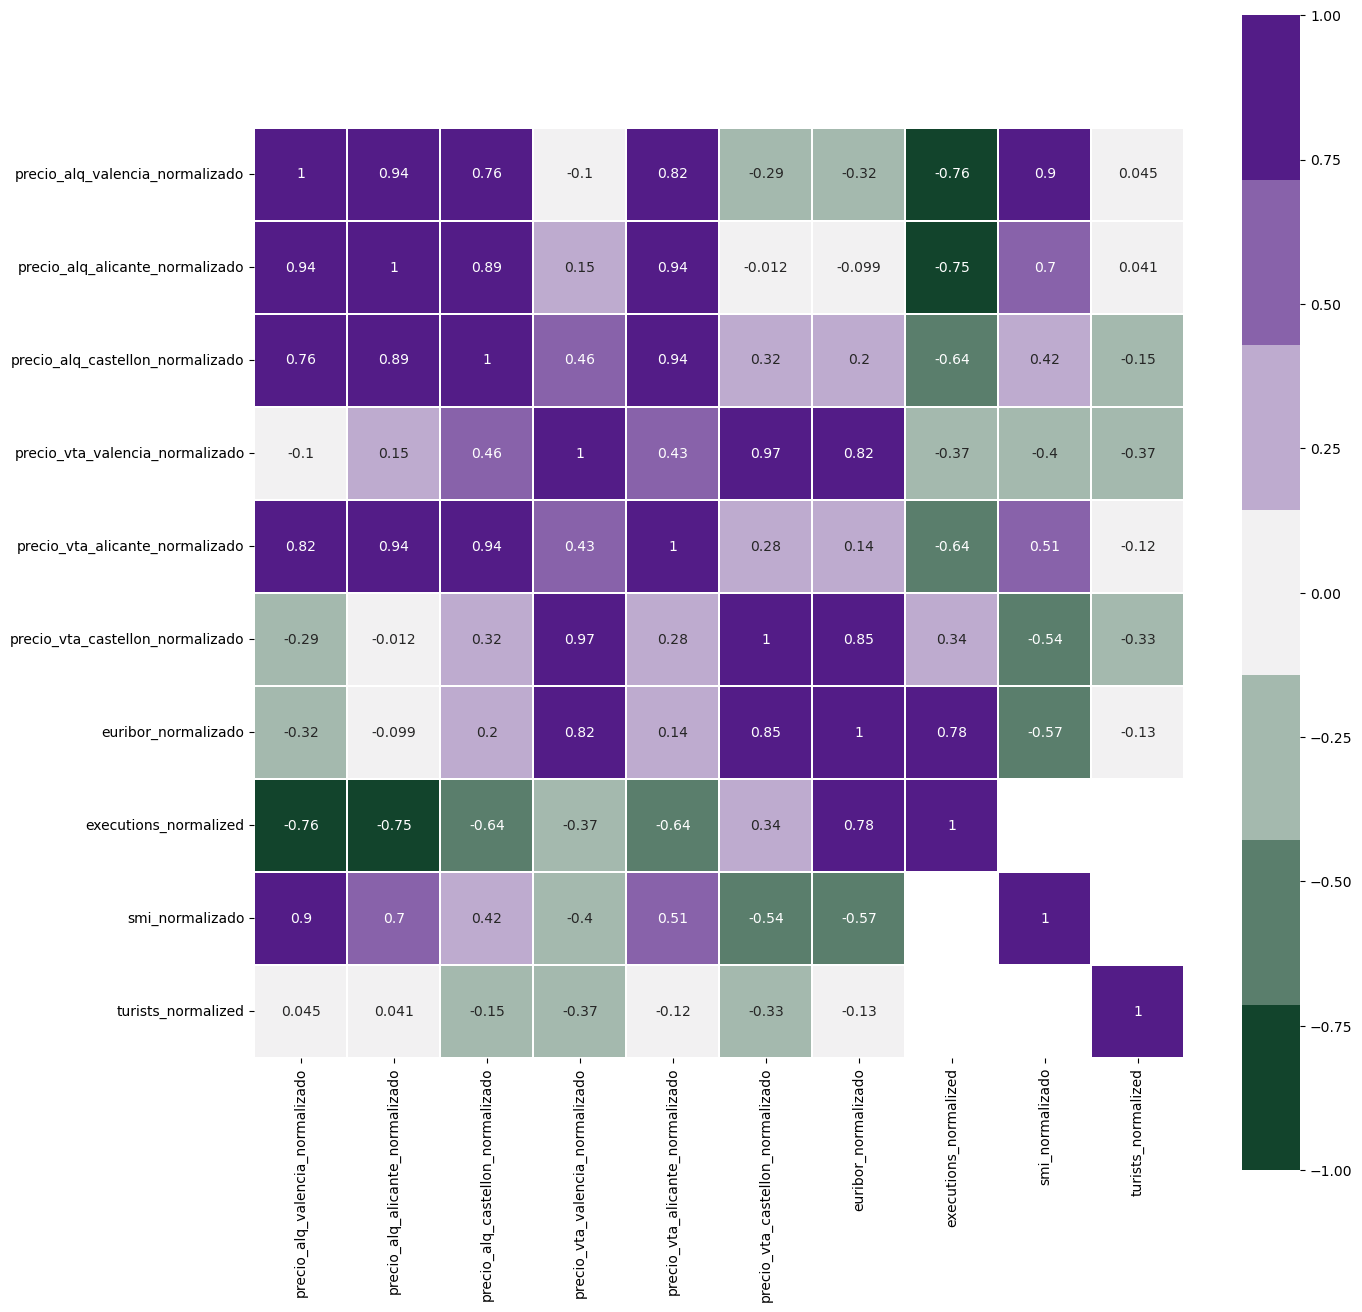

In [209]:
comparation = pd.concat(
        [alq_valencia.loc['2008-08':'2022-08']["precio_alq_valencia_normalizado"],
        alq_alicante.loc['2008-08':'2022-08']["precio_alq_alicante_normalizado"],
        alq_castellon.loc['2008-08':'2022-08']["precio_alq_castellon_normalizado"],
        vta_valencia.loc['2008-08':'2022-08']["precio_vta_valencia_normalizado"],
        vta_alicante.loc['2008-08':'2022-08']["precio_vta_alicante_normalizado"],
        vta_castellon.loc['2008-08':'2022-08']["precio_vta_castellon_normalizado"],
        euribor.loc['2008-08':'2022-08']["euribor_normalizado"],
        mortgages.loc['2008-08':'2022-08']["executions_normalized"],
        ipc.loc['2008-08':'2022-08']["ipc_normalizado"],
        smia.loc['2008-08':'2022-08']["smi_normalizado"],
        nturi.loc['2008-08':'2022-08']["turists_normalized"],
        ], axis=1)

plt.figure(figsize=(15,15))
sns.heatmap(comparation.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.1,
            annot=True);

In [210]:
desde = "2018-08"
hasta = "2022-08"

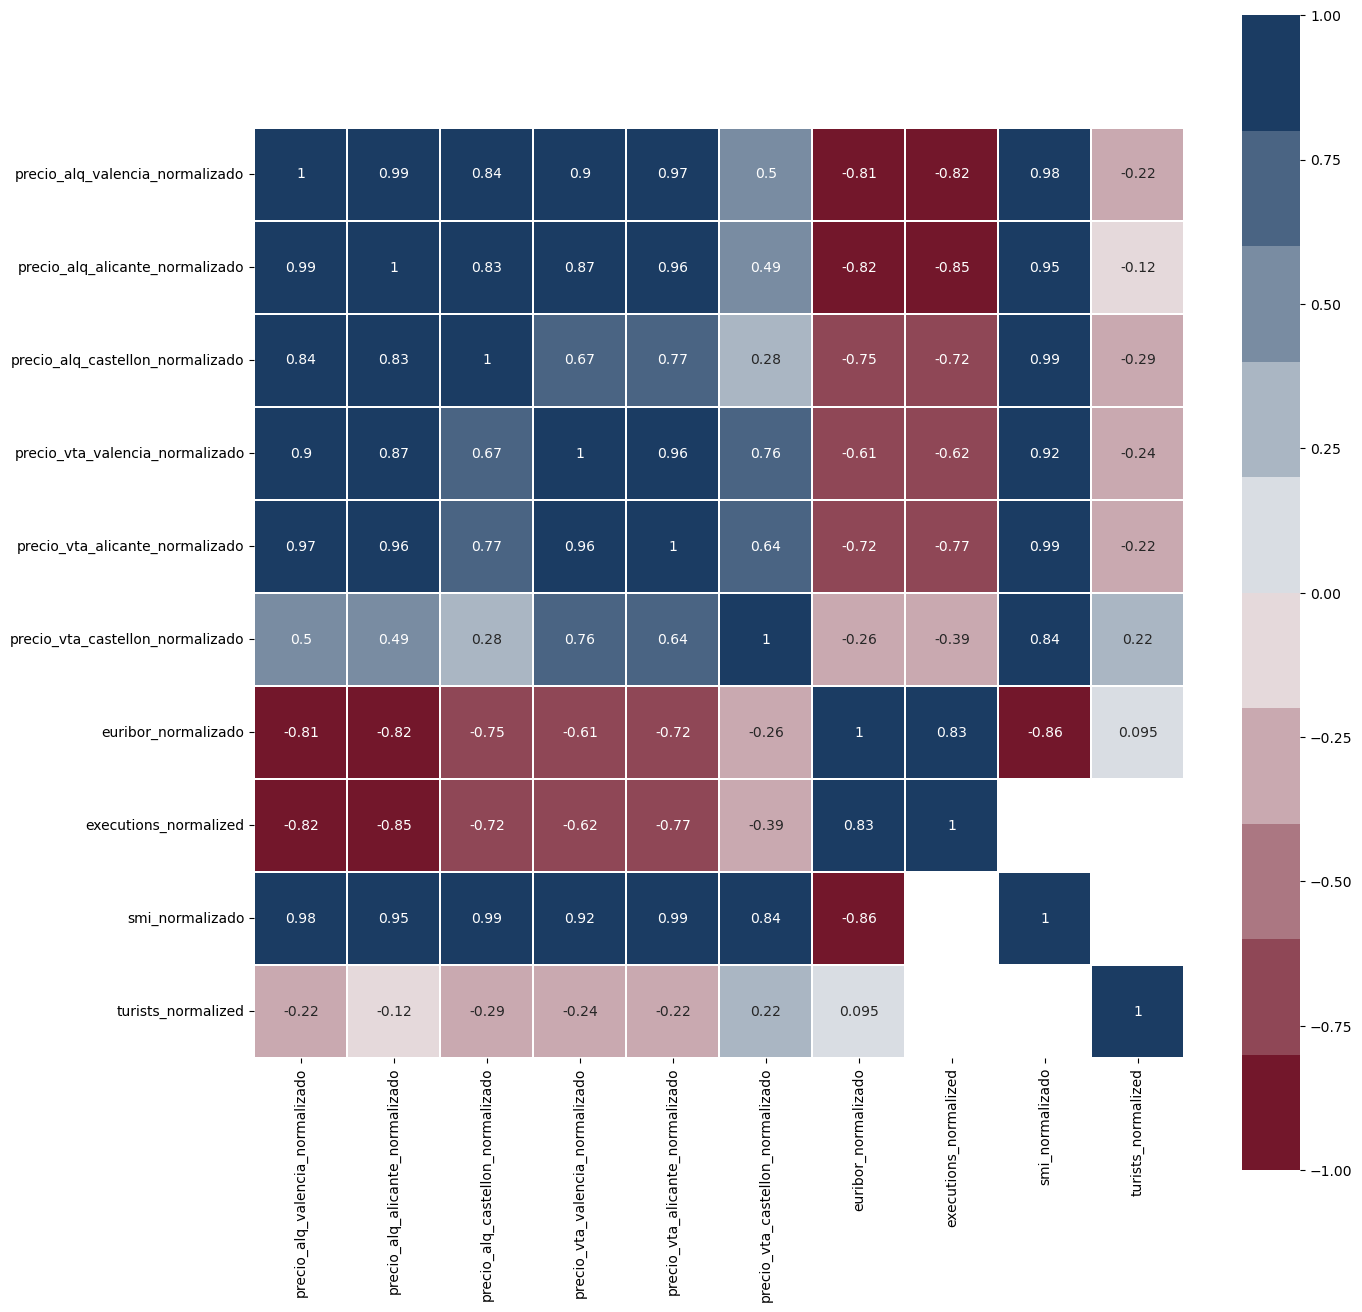

In [211]:
desde = "2015-08"
hasta = "2020-08"

comparation = pd.concat(
        [alq_valencia.loc[desde:hasta]["precio_alq_valencia_normalizado"],
        alq_alicante.loc[desde:hasta]["precio_alq_alicante_normalizado"],
        alq_castellon.loc[desde:hasta]["precio_alq_castellon_normalizado"],
        vta_valencia.loc[desde:hasta]["precio_vta_valencia_normalizado"],
        vta_alicante.loc[desde:hasta]["precio_vta_alicante_normalizado"],
        vta_castellon.loc[desde:hasta]["precio_vta_castellon_normalizado"],
        euribor.loc[desde:hasta]["euribor_normalizado"],
        mortgages.loc[desde:hasta]["executions_normalized"],
        ipc.loc[desde:hasta]["ipc_normalizado"],
        smia.loc[desde:hasta]["smi_normalizado"],
        nturi.loc[desde:hasta]["turists_normalized"],
        ], axis=1)

plt.figure(figsize=(15,15))

sns.heatmap(comparation.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(5, 250, s=80, l=25, n=10),
            square=True,
            linewidths=.1,
            annot=True);

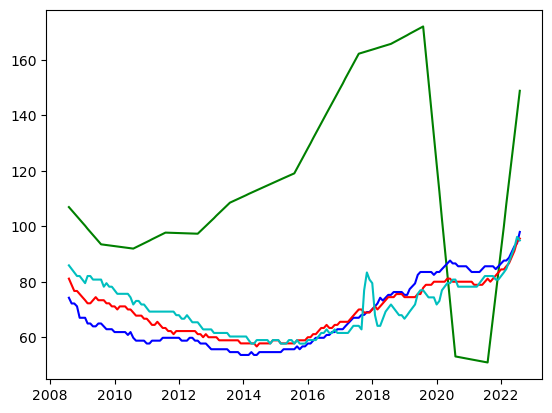

In [83]:
year = alq_alicante.index[(alq_alicante.index >= '2008-08')&(alq_alicante.index <= '2022-08')]
turistas = nturi.loc['2008-08':'2022-08']["turists_normalized"].resample(rule="m", axis=0).mean().interpolate()
valencia_AL = alq_valencia.resample(rule="m", axis=0).mean().loc['2008-08':'2022-08']["precio_alq_valencia_normalizado"]#.interpolate()
alicante_AL = alq_alicante.resample(rule="m", axis=0).mean().loc['2008-08':'2022-08']["precio_alq_alicante_normalizado"]#.interpolate()
castellon_AL = alq_castellon.loc['2008-08':'2022-08']["precio_alq_castellon_normalizado"]#.interpolate()
plt.plot(year, turistas, 'g', label="TURISTAS")
plt.plot(year, valencia_AL, 'b', label="ALQU VALENCIA")
plt.plot(year, alicante_AL,'r', label="ALQU ALICANTE" )
plt.plot(year, castellon_AL,'c', label="ALQU CASTELLON" )

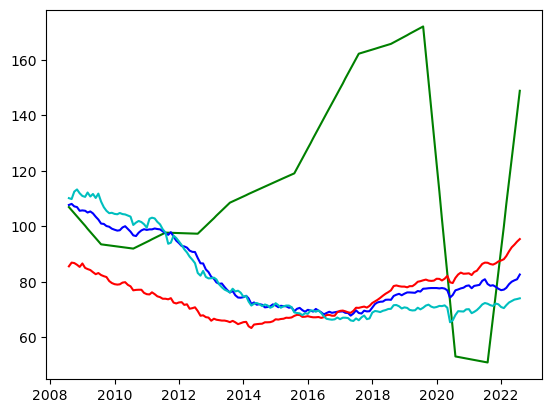

In [84]:
year = alq_alicante.index[(alq_alicante.index >= '2008-08')&(alq_alicante.index <= '2022-08')]
turistas = nturi.loc['2008-08':'2022-08']["turists_normalized"].resample(rule="m", axis=0).mean().interpolate()
valencia_VTA = vta_valencia.resample(rule="m", axis=0).mean().loc['2008-08':'2022-08']["precio_vta_valencia_normalizado"]#.interpolate()
alicante_VTA = vta_alicante.resample(rule="m", axis=0).mean().loc['2008-08':'2022-08']["precio_vta_alicante_normalizado"]#.interpolate()
castellon_VTA = vta_castellon.loc['2008-08':'2022-08']["precio_vta_castellon_normalizado"]#.interpolate()
plt.plot(year, turistas, 'g', label="TURISTAS")
plt.plot(year, valencia_VTA, 'b', label="VTA VALENCIA")
plt.plot(year, alicante_VTA,'r', label="VTA ALICANTE" )
plt.plot(year, castellon_VTA,'c', label="VTA CASTELLON" )